# *1 - Hands-on TensorFlow + Keras + LENET-5*

Implement and train several times using keras API your own LENET-5 implementation. Notice that you will be urged to derive an implementation somehow distinct to the original proposal of LeCun et al.  

## *1.1 - Load tensor flow*

In [1]:
import tensorflow as tf

## *1.2 - Dataset preparation*

### *Import and prepare dataset*

Modified NIST (MNIST) is a database of handwritten digits. It encompasses a training set of 60,000 examples, and a test set of 10,000 examples. Images available in keras library are 28x28x1-sized.

The final part of the following code normalizes the training data to $[0,1]$.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print ("Training set info:",x_train.shape)
print ("Train target info:",y_train.shape)
print ("Test set info:",x_test.shape)
print ("Test target info:",y_test.shape)

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step
Training set info: (60000, 28, 28)
Train target info: (60000,)
Test set info: (10000, 28, 28)
Test target info: (10000,)


### *Show sample images*


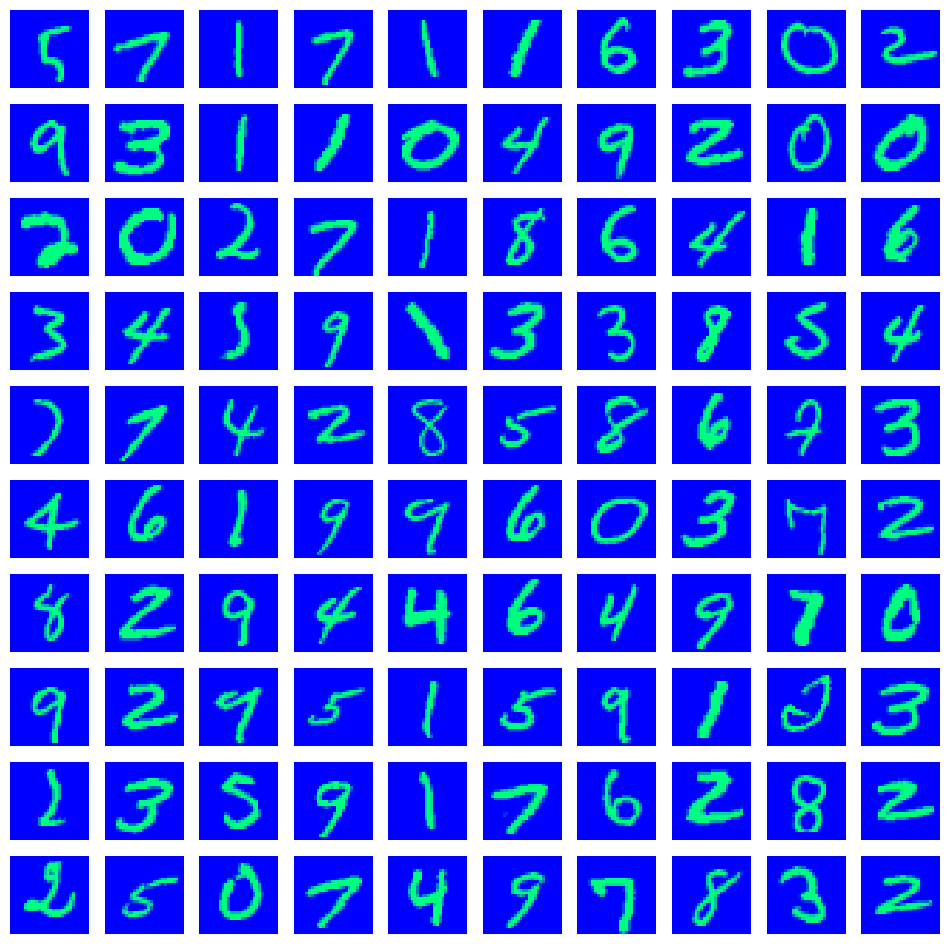

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(100,200):
  ax = plt.subplot(10, 10, i-99)
  plt.axis("off")
  plt.imshow(x_train_norm[i].reshape(28,28),interpolation='nearest')
  plt.winter()

### *1.3 - Create and Initialize LENET-5 Architecture*

The code bellow implements a single-hidden-layer perceptron using Keras functional architecture. 



In [ ]:
import tensorflow as tf

# Here it goes a functional implementation of a MLP
def mymlp_functional( hidd_neu = 128, hidd_act='relu',do_freq=0.2):
  inputs = tf.keras.layers.Input(shape=(28,28))
  x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
  x = tf.keras.layers.Dense(hidd_neu, activation=hidd_act) (x)
  x = tf.keras.layers.Dropout(do_freq) (x)
  outputs = tf.keras.layers.Dense(10, activation='softmax') (x)
  return tf.keras.models.Model(inputs, outputs, name='mymlp')


**Task 1** Implement using the Keras functional API the  [LENET-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

Notice that the LETNET input layer size is 32 x 32 while MNIST images dimensions are 28 x 28. To solve such mismatch, include, after the input layer, a zeros padding layer to insert 2 zero-pixels at each border. Use [ZeroPadding2D](https://keras.io/api/layers/reshaping_layers/zero_padding2d/)  function. 

For the 2D-convolutional and maxpooling layers use the Keras functions [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) and [MaxPool2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/), respectfully.

Also, notice that the original LENET-5 has a Gaussian layer on its output, substitute it by a Dense layer with softmax activation. In addition, incorporate [batch normalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) and dropout to your implementation. 

For further information, consult [Keras layers API ](https://keras.io/api/layers/)   

In [4]:
#Use this space to answer Task 1

def le_net():
  input = tf.keras.layers.Input(shape=(28,28,1))
  x = tf.keras.layers.ZeroPadding2D((2,2))(input)
  x = tf.keras.layers.Conv2D(6, kernel_size=(5,5),strides=(1,1), activation='tanh')(x)
  x = tf.keras.layers.AvgPool2D(pool_size=(2,2))(x)
  x = tf.keras.layers.Activation('sigmoid')(x)
  x = tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh')(x)
  x = tf.keras.layers.AvgPool2D(pool_size=(2,2))(x)
  x = tf.keras.layers.Activation('sigmoid')(x)
  x = tf.keras.layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh')(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(84, activation='tanh')(x)
  x = tf.keras.layers.Dense(10, activation='softmax')(x)
  return tf.keras.models.Model(input, x, name='LeNet')

model = le_net()

**Task 2** Calculate the number of parameters of the above model. Compare the estimatad values to the one provided by 

```
Model.summary()
```



In [15]:
#Use this space to answer Task 2
# primeira camada conv2d
first = ((5*5*1)+1) * 6
# segunda camada conv2d
second = ((5*5*6)+1) * 16
# terceira camada conv2d
third = ((5*5*16)+1) * 120
# primeira camada densa
first_dense = (120+1) * 84
# segunda camada densa
second_dense = (84+1) * 10

summary = first + second + third + first_dense + second_dense
print("Total de Parâmetros: {}".format(summary))
print("Contagem Tensorflow: {}".format(model.count_params()))
print(model.count_params() == summary)


Total de Parâmetros: 61706
Contagem Tensorflow: 61706
True


**Use this space to answer Task 2**

##*1.4 - Network training*

Remember the training process workflow:
1. Architecture setup
2. Network instantiation
3. Parameters initialization.
4. Training graph setup
5. Paramenters optimization
6. Evaluation 

Details can be found in the [keras documentation](https://keras.io/api/models/model_training_apis/). 

**Task 3**: Make a evaluation of the number of training epochs. Use that 'optimal' number of epochs in the remaining tasks.

In [ ]:
# Put you code for Task 3 here
model = le_net()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
EPOCHS = 100
model.fit(x_train_norm, y_train, batch_size=64,epochs=EPOCHS, validation_split=0.033)

Epoch 1/100
907/907 [==============================] - 6s 5ms/step - loss: 1.1518 - accuracy: 0.5947 - val_loss: 0.2935 - val_accuracy: 0.9177
Epoch 2/100
907/907 [==============================] - 4s 4ms/step - loss: 0.3200 - accuracy: 0.8984 - val_loss: 0.1607 - val_accuracy: 0.9561
Epoch 3/100
907/907 [==============================] - 4s 4ms/step - loss: 0.2514 - accuracy: 0.9198 - val_loss: 0.1362 - val_accuracy: 0.9641
Epoch 4/100
907/907 [==============================] - 4s 5ms/step - loss: 0.2105 - accuracy: 0.9326 - val_loss: 0.1212 - val_accuracy: 0.9657
Epoch 5/100
907/907 [==============================] - 4s 4ms/step - loss: 0.1832 - accuracy: 0.9406 - val_loss: 0.1185 - val_accuracy: 0.9702
Epoch 6/100
907/907 [==============================] - 4s 4ms/step - loss: 0.1621 - accuracy: 0.9485 - val_loss: 0.1108 - val_accuracy: 0.9707
Epoch 7/100
907/907 [==============================] - 4s 5ms/step - loss: 0.1502 - accuracy: 0.9519 - val_loss: 0.1090 - val_accuracy: 0.9717

Put your accuracy results for training and test data in a table inside the next cell. Remind the 'best' number of epochs. This value will be used in the following experiments. 

50 Epochs:loss: 0.0646 - accuracy: 0.9790 - val_loss: 0.0545 - val_accuracy: 0.9864<br>
70 Epochs: loss: 0.0390 - accuracy: 0.9871 - val_loss: 0.0518 - val_accuracy: 0.9899<br>
100 Epochs: loss: 0.0183 - accuracy: 0.9935 - val_loss: 0.0651 - val_accuracy: 0.9864

**Task 4**: Train from the scratch a LENET-5 network through the previously  determined number of epochs 

In [17]:
#Put your code for Task 4 here

model = le_net()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
EPOCHS = 100
model.fit(x_train_norm, y_train, batch_size=64,epochs=EPOCHS, validation_split=0.033)

Epoch 1/100
907/907 [==============================] - 6s 4ms/step - loss: 1.6894 - accuracy: 0.3778 - val_loss: 0.4876 - val_accuracy: 0.8500
Epoch 2/100
907/907 [==============================] - 4s 5ms/step - loss: 0.4732 - accuracy: 0.8420 - val_loss: 0.2622 - val_accuracy: 0.9212
Epoch 3/100
907/907 [==============================] - 4s 4ms/step - loss: 0.3499 - accuracy: 0.8849 - val_loss: 0.1842 - val_accuracy: 0.9500
Epoch 4/100
907/907 [==============================] - 4s 4ms/step - loss: 0.2938 - accuracy: 0.9052 - val_loss: 0.2182 - val_accuracy: 0.9354
Epoch 5/100
907/907 [==============================] - 4s 5ms/step - loss: 0.2613 - accuracy: 0.9165 - val_loss: 0.1451 - val_accuracy: 0.9621
Epoch 6/100
907/907 [==============================] - 4s 4ms/step - loss: 0.2384 - accuracy: 0.9226 - val_loss: 0.1480 - val_accuracy: 0.9561
Epoch 7/100
907/907 [==============================] - 4s 4ms/step - loss: 0.2217 - accuracy: 0.9296 - val_loss: 0.1817 - val_accuracy: 0.9460

In [18]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9766


[0.08074134588241577, 0.9765999913215637]

##*1.5 - Rigorous evaluation*
Tasks 5 to 10 will introduce yoursel to a more thorought evaluation of the network trained in **task 4**. It is a really important need for ensuring network quality.

**Task 5**: Obtain the test set [confusion matrix](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html) for the above trained network.

 

157/157 [==============================] - 0s 2ms/step


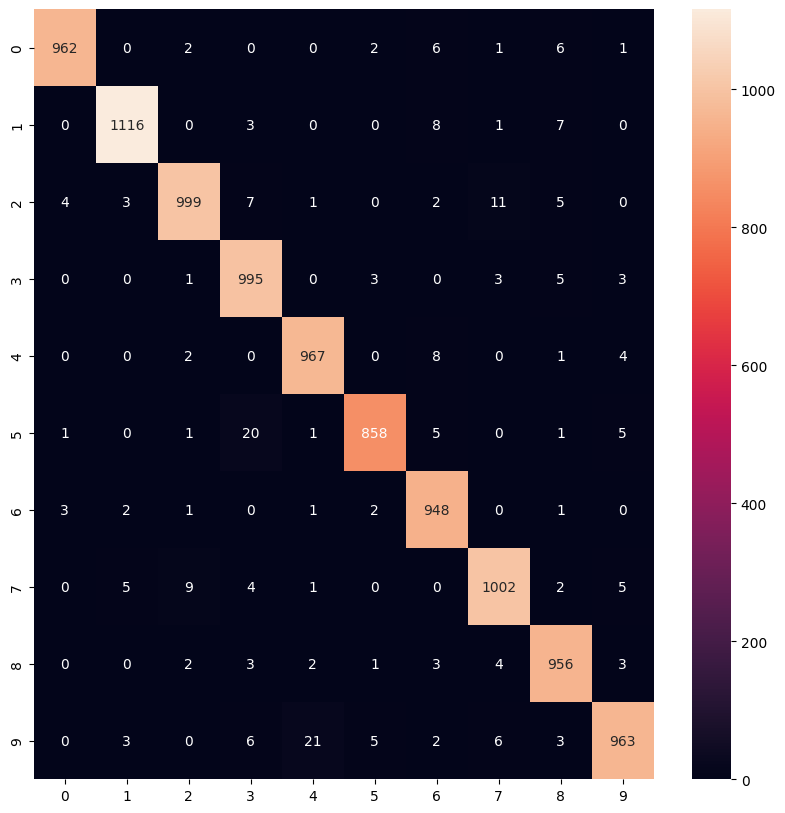

In [19]:
#Put your code for Task 5 here
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_norm, batch_size=64)
predicted = tf.concat(y_pred, axis=0)
predicted = tf.argmax(predicted, axis=1)
conf_matrix = tf.math.confusion_matrix(y_test,predicted, num_classes=10)

plt.figure(figsize=(10,10))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

**Task 6**: Present the [overall accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [26]:
#Put your code for Task 6 here
# total de amostras
total = len(x_test_norm)
oa = (962 + 1116 + 999 + 995 + 967 + 858 + 948 + 1002 + 956 + 963)/total
print("Overall Accuracy: {:.2f}".format(oa*100))

Overall Accuracy: 97.66


**Task 7**: Present the [errors of omission and commission](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [28]:
err_omission = [8/ 970, 13/ 1129, 18/ 1017, 43/ 1038, 27/ 994, 13/ 871, 34/ 982, 26/ 1028, 31/ 987, 21/ 984]
err_comission = [18/980, 19/1135, 33/1032, 15/1010, 15/982, 34/892, 10/958, 26/1028, 18/974, 46/1009]

for i in range(10):
  print("Error Omission(%) {}: {:.2f}".format(i, err_omission[i]*100))
  print("Error Comission(%) {}: {:.2f}".format(i, err_comission[i]*100))
  print()

Error Omission(%) 0: 0.82
Error Comission(%) 0: 1.84

Error Omission(%) 1: 1.15
Error Comission(%) 1: 1.67

Error Omission(%) 2: 1.77
Error Comission(%) 2: 3.20

Error Omission(%) 3: 4.14
Error Comission(%) 3: 1.49

Error Omission(%) 4: 2.72
Error Comission(%) 4: 1.53

Error Omission(%) 5: 1.49
Error Comission(%) 5: 3.81

Error Omission(%) 6: 3.46
Error Comission(%) 6: 1.04

Error Omission(%) 7: 2.53
Error Comission(%) 7: 2.53

Error Omission(%) 8: 3.14
Error Comission(%) 8: 1.85

Error Omission(%) 9: 2.13
Error Comission(%) 9: 4.56



**Task 8**: Present [user's  and producer's accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [29]:
#Put your code for Task 8 here
producer_accuracy = [962/ 970, 1116/ 1129, 999/ 1017, 995/ 1038, 967/ 994, 858/ 871, 948/ 982, 1002/ 1028, 956/ 987, 963/ 984]
user_accuracy = [962/980, 1116/1135, 999/1032, 995/1010, 967/982, 858/892, 948/958, 1002/1028, 956/974, 963/1009]

for i in range(10):
  print("Error Omission(%) {}: {:.2f}".format(i, producer_accuracy[i]*100))
  print("Error Comission(%) {}: {:.2f}".format(i, user_accuracy[i]*100))
  print()

Error Omission(%) 0: 99.18
Error Comission(%) 0: 98.16

Error Omission(%) 1: 98.85
Error Comission(%) 1: 98.33

Error Omission(%) 2: 98.23
Error Comission(%) 2: 96.80

Error Omission(%) 3: 95.86
Error Comission(%) 3: 98.51

Error Omission(%) 4: 97.28
Error Comission(%) 4: 98.47

Error Omission(%) 5: 98.51
Error Comission(%) 5: 96.19

Error Omission(%) 6: 96.54
Error Comission(%) 6: 98.96

Error Omission(%) 7: 97.47
Error Comission(%) 7: 97.47

Error Omission(%) 8: 96.86
Error Comission(%) 8: 98.15

Error Omission(%) 9: 97.87
Error Comission(%) 9: 95.44



**Task 9**: Obtain the [Kappa]((http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html))

In [31]:
#Put your code for Task 9 here
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, predicted)

print("Kappa: {:.4f}".format(kappa))

Kappa: 0.9740


**Task 10**: Initialize and train this model 10 times and take note of the values obtained at each round.

In [37]:
#Put your code for Task 10 here

for i in range(10):
  print("Run # {}".format(i))
  print("----------------------------------------------")
  model = le_net()
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  EPOCHS = 11
  model.fit(x_train_norm, y_train, batch_size=64,epochs=EPOCHS, validation_split=0.033)
  print("Train Accuracy: {}".format(model.evaluate(x_train_norm, y_train)[1]))
  print("Test Accuracy: {}".format(model.evaluate(x_test_norm, y_test)[1]))

Run # 0
----------------------------------------------
Epoch 1/11
907/907 [==============================] - 6s 4ms/step - loss: 2.3159 - accuracy: 0.1040 - val_loss: 2.3067 - val_accuracy: 0.1071
Epoch 2/11
907/907 [==============================] - 4s 4ms/step - loss: 1.5398 - accuracy: 0.4354 - val_loss: 0.5035 - val_accuracy: 0.8278
Epoch 3/11
907/907 [==============================] - 5s 5ms/step - loss: 0.4243 - accuracy: 0.8663 - val_loss: 0.3134 - val_accuracy: 0.9051
Epoch 4/11
907/907 [==============================] - 4s 4ms/step - loss: 0.3277 - accuracy: 0.8959 - val_loss: 0.1902 - val_accuracy: 0.9444
Epoch 5/11
907/907 [==============================] - 4s 4ms/step - loss: 0.2736 - accuracy: 0.9125 - val_loss: 0.1742 - val_accuracy: 0.9535
Epoch 6/11
907/907 [==============================] - 4s 5ms/step - loss: 0.2426 - accuracy: 0.9221 - val_loss: 0.1562 - val_accuracy: 0.9500
Epoch 7/11
907/907 [==============================] - 4s 4ms/step - loss: 0.2283 - accuracy: 

|Run | Train_Accuracy | Test_Accuracy|
|----|----------------|--------------|
|0   | 0.9571666717529297| 0.9567000269889832|
|1   |  0.9478833079338074| 0.9478999972343445|
|2   | 0.9681166410446167| 0.9675999879837036|
|3   | 0.9676166772842407| 0.9660000205039978|
|4   | 0.9669833183288574| 0.9678999781608582|
|5   | 0.9585833549499512| 0.963100016117096|
|6   | 0.9658166766166687| 0.9679999947547913|
|7   | 0.9455166459083557| 0.946399986743927|
|8   | 0.9649500250816345| 0.9634000062942505|
|9   | 0.9691833257675171|  0.9664999842643738|

*1.6 - Optimizers*

Evaluate the impact of optimizer's choice during training process.


**Task 11**: While using the same number of training epochs as before, vary the [optimizers](https://keras.io/api/optimizers/#available-optimizers). Save the training history for each training, then plot histories of both losses and accuracies in the training set. Also compare the training and test final accuracy values obtained using each optimizer.  

Click here for [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) documentation. There you may find the following variants:

  * SGD
  * RMSprop
  * Adam
  * Adadelta
  * Adagrad
  * Adamax
  * Nadam
  * Ftrl
 



In [36]:
# Put your code here for Task 11
optimizers = ["adam", "sgd", "rmsprop", "adadelta", "adagrad", "adamax", "nadam", "ftlr"]
for i in range(len(optimizers)):
  print("Run # {}".format(i))
  print("----------------------------------------------")
  model = le_net()
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  EPOCHS = 11
  model.fit(x_train_norm, y_train, batch_size=64,epochs=EPOCHS, validation_split=0.033)
  print("Train Accuracy: {}".format(model.evaluate(x_train_norm, y_train)[1]))
  print("Test Accuracy: {}".format(model.evaluate(x_test_norm, y_test)[1]))

Run # 0
----------------------------------------------
Epoch 1/11
907/907 [==============================] - 6s 5ms/step - loss: 1.3206 - accuracy: 0.5249 - val_loss: 0.2701 - val_accuracy: 0.9293
Epoch 2/11
907/907 [==============================] - 5s 6ms/step - loss: 0.3227 - accuracy: 0.8988 - val_loss: 0.1827 - val_accuracy: 0.9495
Epoch 3/11
907/907 [==============================] - 6s 7ms/step - loss: 0.2518 - accuracy: 0.9206 - val_loss: 0.1482 - val_accuracy: 0.9586
Epoch 4/11
907/907 [==============================] - 6s 7ms/step - loss: 0.2090 - accuracy: 0.9348 - val_loss: 0.1503 - val_accuracy: 0.9611
Epoch 5/11
907/907 [==============================] - 6s 7ms/step - loss: 0.1798 - accuracy: 0.9430 - val_loss: 0.1235 - val_accuracy: 0.9662
Epoch 6/11
907/907 [==============================] - 6s 7ms/step - loss: 0.1599 - accuracy: 0.9497 - val_loss: 0.1059 - val_accuracy: 0.9697
Epoch 7/11
907/907 [==============================] - 6s 6ms/step - loss: 0.1422 - accuracy: 

|Optimizer | Train_Accuracy | Test_Accuracy|
|----|----------------|--------------|
|Adam  |0.972350001335144| 0.9732000231742859|
|SGD   |  0.9603333473205566| 0.9599000215530396|
|RMSprop   | 0.9603666663169861| 0.9592999815940857|
|AdaDelta   | 0.9700666666030884| 0.9693999886512756|
|AdaGrad   | 0.9576666951179504| 0.9556000232696533|
|AdaMax   | 0.9699833393096924| 0.9693999886512756|
|Nadam   | 0.979366660118103| 0.9776999950408936|
|FTLR   | 0.9662333130836487| 0.9660999774932861|
